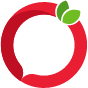

# Exploratory Analysis of Torob Search Data

Greetings and a warm welcome from Torob Data Team!

We are very excited to share with you the Torob's search data for the task of exploratory data analysis as part of OpenAI Summer School 2022. The data consists of users' search logs as well as their clicks on search results in Torob. It also includes information for a sample of the products and product categories. In this notebook, you will analyze this data and answer some questions with the goal of practicing your data analysis skills (especially the ability to work with Pandas) and also extract insightful information from our users' searches and their interaction with the search results.

Note that our original daily search data is very large (you may need gigabytes of RAM and disk space to handle the data of just one day!). So, for practical purposes and due to the size constraints, the original data has been sampled and reduced, and what you'll work with is just a small fraction of the data of one week. 

The sections marked with a triangular flag (🚩) are those which you need to read and answer. Allright, without further ado let's get started!

(NOTE: Here is the link to the guideline document of the project: https://docs.google.com/document/d/1r46gWcSXwvxxpS92cOqqA7pLuX1Vq673rokgwtnafb8/edit?usp=sharing)

---

## Import modules/libraries

So, as usual, we first need to import the neccessary libraries and modules which we would use:

In [1]:
import pandas as pd
import numpy as np

---

## Load and Inspect Data

In this section we load the data from given files, and then we take a quick look at their structure and make sure they have been loaded properly.

### 🚩Load data from disk

First, we need to load the data from disk as Pandas dataframes. There are four different dataframes which need to be loaded:
- Search logs, stored in `search_logs.pkl`.
- Search click logs, stored in `search_click_logs.pkl`.
- Products info, stored in `products.pkl`.
- Product categories info, stored in `categories.pkl`.

Let's load them all and store each of them in a separate variable:

**Write the answer below:** \
(Hint: Since they are stored as *pickled* files, we can easily use `pd.read_pickle` function.)

In [2]:
search_logs_df = pd.read_pickle('data/search_logs.pkl')
search_click_logs_df = pd.read_pickle('data/search_click_logs.pkl')
products_df = pd.read_pickle('data/products.pkl')
categories_df = pd.read_pickle('data/categories.pkl')

### 🚩A quick peek at the data

To quickly get a feel of the strucure of the data and see if it has been loaded correctly, we can check the first few rows of the dataframes. Let's take a look at the first five rows of each dataframe we loaded in the previous step:

**Write the answer below:** \
(Hint: heads or tails?!)

In [3]:
search_logs_df.head()

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU


In [4]:
search_click_logs_df.head()

,id,datetime,search_id,rank
0,jstyz,2022-05-13 19:30:14.030000+00:00,iitnm,1
1,ewusk,2022-05-13 19:30:24.290000+00:00,scjlb,2
2,osnio,2022-05-13 19:30:24.394000+00:00,ohuqq,6
3,expgi,2022-05-13 19:30:30.500000+00:00,pzrcn,3
4,srgdy,2022-05-13 19:30:32.884000+00:00,mhlmr,5


In [5]:
products_df.head()

,id,title,category_id
0,758287,میکروسکوپ سلسترون مدل 44121,262
1,7164195,دوربین عکاسی نیکون مدل Nikon D5600 body,1273
2,3242621,دوچرخه شهری قناری مدل Space Shuttle سایز 16,3882
3,4277974,دوچرخه سایز 16 مدل 2020 Flying Bear قناری,3882
4,8671305,دوچرخه 12 قناری مدل JENNY,4320


In [6]:
categories_df.head()

,title,id,parent_category_id
0,گوشی موبایل,2580,175.0
1,تبلت,9458,175.0
2,هدفون، هدست و هندزفری,1092,175.0
3,لوازم جانبی موبایل و تبلت,8192,175.0
4,قطعات موبایل و تبلت,3596,175.0


---

## Data Validation

Before starting our analysis, it's a good practice to validate the consistency of the data values and constraints with our expectations. There are various validity checks that could be done, and below we give you two examples.

### 🚩Validate uniquness of ID columns

For example, we can confirm whether all the unique ID columns (i.e. `id` column) have no duplicate values for all the dataframes we have. Let's check this for all the four dataframes:

**Write the answer below:**

In [7]:
dups_search_logs = search_logs_df.duplicated(subset=['id'])
print(dups_search_logs.value_counts())

dups_search_click_logs = search_click_logs_df.duplicated(subset=['id'])
print(dups_search_click_logs.value_counts())

dups_products = products_df.duplicated(subset=['id'])
print(dups_products.value_counts())

dups_categories = categories_df.duplicated(subset=['id'])
print(dups_categories.value_counts())

# All ids are unique


False    539289
dtype: int64
False    295692
dtype: int64
False    108046
dtype: int64
False    3137
dtype: int64


### 🚩Validate all the search clicks have a valid rank value

Here, we would like to check two things about the rank of search click records: 1) they have no NaN value, 2) they are all between 0 and 9 (because searches have at most 10 results). Let's do these checks:

**Write the answer below:**

In [8]:
print(search_click_logs_df['rank'].isnull().sum())
print(search_click_logs_df.loc[(search_click_logs_df['rank'] < 0) | (search_click_logs_df['rank'] > 9)])


0
Empty DataFrame
Columns: [id, datetime, search_id, rank]
Index: []


---

## Exploratory Data Analysis (EDA)

Now that we have loaded the data, we are ready to start the processing and analysis of our data.

### 🚩Number of searches and search clicks

The most basic stat we can get from our data is the number of searches and search clicks we have. Let's find and print them:

**Write the answer below:**

In [9]:
print("number of searches is :", len(search_logs_df))
print("number of search clicks is :", len(search_click_logs_df))

number of searches is : 539289
number of search clicks is : 295692


### 🚩Number of unique search queries

We can also calculate the number of unique search queries.

**Write the answer below:**

In [10]:
unique_search_log_df = search_logs_df['raw_query'].drop_duplicates()
unique_search_log_df.reset_index(drop=True)

0           سرویس ملامین نشکن
1                   جارو برقی
2                   دسته ps4 
3                کلو تریمازول
4               قرص فولی کوژن
                 ...         
260188     اسکیت دخترانه قرمز
260189       سیم گیرنده رادیو
260190    دستگاه همزن اب زرشک
260191         گیره تزیینی مو
260192      دراپ بنر بی تی اس
Name: raw_query, Length: 260193, dtype: object

### 🚩Number of unique users

Another basic stat is the number of unique users who searched on Torob. We can use `user_id` column to calculate this:

**Write the answer below:**

In [11]:
unique_search_log_df = search_logs_df['user_id'].drop_duplicates()
unique_search_log_df.reset_index(drop=True)

0         MPOHZ
1         NZPJN
2         NRMQA
3         WRYZT
4         TJLWU
          ...  
311078    HSJYV
311079    OUSMO
311080    JVLCM
311081    HTSOL
311082    MVVMZ
Name: user_id, Length: 311083, dtype: object

### 🚩Most frequent search queries

We would like to know which search queries are the most popular (i.e. most frequent). We can use the "search logs" data to find the answer. Find the top 20 most searched queries along with their number of searches:

**Write the answer below:**

In [12]:
search_logs_df['raw_query'].value_counts().head(20)

iphone           7626
دلار امریکا      3240
کفش              3211
روغن             2956
لپ تاپ ایسوس     1940
دوربین عکاسی     1929
شیر              1781
دوچرخه 26        1689
xbox series s    1617
لباس عروس        1577
گوشی             1454
روغن موتور       1333
ماکروویو         1196
xiaomi 12 pro    1083
کاغذ a4          1012
تلویزیون          843
گوشی سامسونگ      812
دوچرخه            807
یخچال             789
روغن خوراکی       787
Name: raw_query, dtype: int64

### 🚩Distribution of length of search queries

We expect that the majority of search queries consist of at most three words. Let's confirm our expectation by calculating the number of words in each search query and then aggregate these values to see how the length of queries is distributed (i.e. find the distribution of number of words in search queries):

**Write the answer below:**  
(Hint: for the sake of simplicity, you can assume that in each search query the words are separated from each other by one or more whitespace characters. Yes, we know this is a simplification and has errors, but it's a good approximation. Further, note that the `str` acessor in Pandas gives you a lot of good methods for processing columns of type string and list.)

In [13]:
seprated_words_of_sq = search_logs_df['raw_query'].copy(deep=True)
print(seprated_words_of_sq.str.split( ' ', n = -1, expand = False))
seprated_words_of_sq = seprated_words_of_sq.replace(r'^\s+', '', regex=True) \
                                            .replace(r'\s+$', '', regex=True)
seprated_words_of_sq = seprated_words_of_sq.str.split( ' ', n = -1, expand = False)
print(seprated_words_of_sq.str.len().value_counts())

0           [سرویس, ملامین, نشکن]
1                    [جارو, برقی]
2                 [, دسته, ps4, ]
3                 [کلو, تریمازول]
4               [قرص, فولی, کوژن]
                   ...           
539284         [گیره, تزیینی, مو]
539285    [دراپ, بنر, بی, تی, اس]
539286        [مینی, فرز, رونیکس]
539287                     [t295]
539288            [سرویس, قابلمه]
Name: raw_query, Length: 539289, dtype: object
2    212560
3    139912
1    138525
4     42641
5      5239
6       393
7        17
8         1
9         1
Name: raw_query, dtype: int64


### 🚩Most common words in search queries

Which words were most commonly used in the search queries? Find the top 20 most common words along with their number of occurrences in search queries:

**Write the answer below:**  
(Hint: split + explode!!!)

In [14]:
from itertools import chain

indexes = list(chain(
    *[[id]*len(word) for id, word in zip(seprated_words_of_sq.index, seprated_words_of_sq)]
))    

seprated_words_of_sq_df = pd.DataFrame({
    'index': indexes,
    'word': list(chain(*seprated_words_of_sq))
})
seprated_words_of_sq_df.set_index('index', inplace=True)
seprated_words_of_sq_df.value_counts().head(20)

word   
گوشی       12606
روغن       11010
iphone      9228
موتور       8039
کفش         7933
pro         6381
دوچرخه      6094
سامسونگ     5598
لباس        5334
ماشین       5266
ساعت        5132
پراید       5109
کولر        4777
ای          4418
برقی        4400
تاپ         4179
مردانه      4096
یخچال       4040
دوربین      4026
لپ          3987
dtype: int64

### 🚩Localize date and time values

Currently, the date & time values in the search and search-click dataframes are stored in UTC timezone. This is a best-pratice to store timestamp values in UTC when the data is stored in databases; however, for our next time-based analyses to be more understandable, we need to convert them all to Tehran timezone.

Convert and replace the `datetime` columns in both search and search-click dataframes:

**Write the answer below:**  
(Hint: in Pandas, datetime columns have a `dt` accessor which offers some methods for manipulation of datetime values. Here, you should look for `tz_convert` method and use `'Asia/Tehran'` as the timezone.)

In [15]:
search_logs_df.datetime = search_logs_df.datetime.dt.tz_convert('Asia/Tehran')
search_click_logs_df.datetime = search_click_logs_df.datetime.dt.tz_convert('Asia/Tehran')

### 🚩Number of searches and search-clicks per weekday

Now that we have converted the datetime to Tehran timezone, we are interested to know how many searches and search-clicks exist per weekday (i.e. Saturday, Sunday, Monday, etc.). We expect that both of these numbers to be a bit lower on weekends (i.e. Thursday and Friday).

Calculate the number of searches and search-clicks per weekday and plot both alongside each other in a single bar plot:

**Write the answer below:**  
(Hint: again, you can use the methods which exist via `dt` accessor to get the weekday of datetime values. As a challenge, try to write all the calculations and plotting in just a single python statement by using method chaining... a lot!)

<AxesSubplot:xlabel='weekday'>

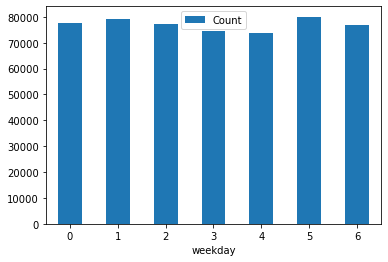

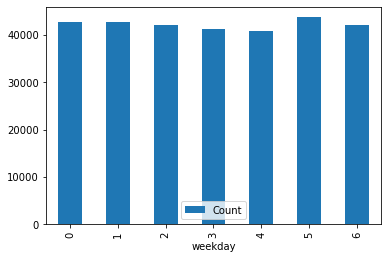

In [29]:

# Monday=0, Sunday=6.
number_of_searches_per_weekday = search_logs_df.datetime.dt.weekday
number_of_search_clicks_per_weekday = search_click_logs_df.datetime.dt.day_of_week

number_of_searches_per_weekday_df = pd.DataFrame({'weekday':number_of_searches_per_weekday.value_counts().index, 'Count': number_of_searches_per_weekday.value_counts().values})
number_of_search_clicks_per_weekday_df = pd.DataFrame({'weekday':number_of_search_clicks_per_weekday.value_counts().index, 'Count':number_of_search_clicks_per_weekday.value_counts().values})

number_of_searches_per_weekday_df.sort_values('weekday').plot.bar(x='weekday', y='Count', rot=0)
number_of_search_clicks_per_weekday_df.sort_values('weekday').plot.bar(x='weekday', y='Count')

### 🚩Number of searches and search-clicks per hour of day

Next, we would like to know which hour during the day has the most search traffic.

Calculate the number of searches and search-clicks per hour and plot both alongside each other in a single bar plot (note that we are just interested in the hour regardless of the specific day; so the result should be aggregated based on hour **over all the days**):

**Write the answer below:**  
(Hint: again, `dt` accessor is your friend here as well!)

<AxesSubplot:xlabel='hour'>

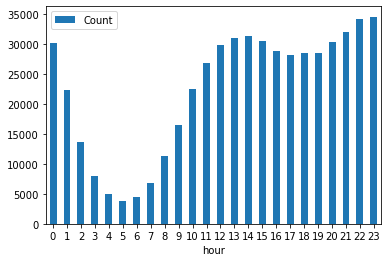

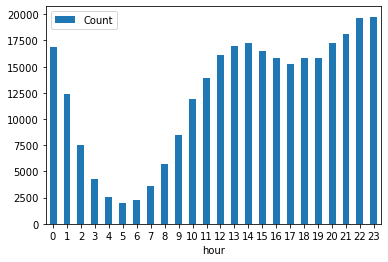

In [30]:
number_of_searches_per_hour = search_logs_df.datetime.dt.hour
number_of_search_clicks_per_hour = search_click_logs_df.datetime.dt.hour


number_of_searches_per_hour_df = pd.DataFrame({'hour':number_of_searches_per_hour.value_counts().index, 'Count': number_of_searches_per_hour.value_counts().values})
number_of_search_clicks_per_hour_df = pd.DataFrame({'hour':number_of_search_clicks_per_hour.value_counts().index, 'Count':number_of_search_clicks_per_hour.value_counts().values})

number_of_searches_per_hour_df.sort_values('hour').plot.bar(x='hour', y='Count', rot=0)
number_of_search_clicks_per_hour_df.sort_values('hour').plot.bar(x='hour', y='Count', rot=0)



### 🚩Top 10 most frequent search queries per weekday

Now, instead of calculating the most frequent queries over all the timeframe of the data, we would like to find the top 10 most frequent queries per weekday (note that we don't need the number of searches for each query; we are just interested in the queries themeselves).

**Write the answer below:**  

### 🚩Number of searches per user

Next, we would like to know how many of the searches are done by our regular visitors or loyal users.

Calculate the number of searches per user such that we could know the number of users with at most 3 searches, between 4 and 9 searches, and at least 10 searches.

**Write the answer below:**  

In [32]:
number_of_searches_done_by_each_user = pd.DataFrame({'user_id':search_logs_df.user_id.value_counts().index, 'Number of searches': search_logs_df.user_id.value_counts().values})
print(number_of_searches_done_by_each_user.head(5))
print(number_of_searches_done_by_each_user[number_of_searches_done_by_each_user['Number of searches'] < 4])
print(number_of_searches_done_by_each_user.loc[(number_of_searches_done_by_each_user['Number of searches'] > 3) & (number_of_searches_done_by_each_user['Number of searches'] < 10)])
# number_of_searches_done_by_each_user


  user_id  Number of searches
0   NDQAS                 407
1   IUFBI                 138
2   PIIYT                  94
3   XQTZS                  93
4   EMDSX                  92
       user_id  Number of searches
24570    AISOU                   3
24571    RNPAD                   3
24572    TNMCT                   3
24573    QYSYX                   3
24574    RRILF                   3
...        ...                 ...
311078   TPMTL                   1
311079   MRHPH                   1
311080   JTDEU                   1
311081   BUPQW                   1
311082   MVVMZ                   1

[286513 rows x 2 columns]
      user_id  Number of searches
2347    VECIG                   9
2348    GOGZY                   9
2349    DAXYG                   9
2350    XXWJL                   9
2351    IXMYC                   9
...       ...                 ...
24565   LLYWV                   4
24566   XMWZX                   4
24567   QHCSB                   4
24568   XDAKK                   4

### 🚩Number of searches with or without a category

For some of the searches, a product category is also selected by the user which limits the search results to only the products in the selected category. We would like to find the number of these searches and compare it against searches without category.

Calculate the number of searches with and without a selected category by users:

**Write the answer below:**  
(Hint: if `category_id` is `NaN` for a search record, it means that search was performed without selecting a category; and consider that Pandas is very NA-friendly and also has methods for detecting `NaN` values.)

In [19]:
print('Number of searches with selected category by users is:', search_logs_df.category_id.count())

print('Number of searches without selected category by users is:', search_logs_df.category_id.isna().sum())

Number of searches with selected category by users is: 129240
Number of searches without selected category by users is: 410049


### 🚩Most frequent search queries among searches with a category

This is the same as the earlier exercise for finding the most frequent search queries, but it only consider searches with a selected category by user.

Find the top 10 most frequent search queries among searches with a category, along with their number of searches:

**Write the answer below:**  

In [36]:
searches_with_category_df = search_logs_df[search_logs_df['category_id'].notna()]
searches_with_category_df = searches_with_category_df.reset_index(drop=True)
searches_with_category_df['raw_query'].value_counts().head(10)
# searches_with_category_df

روغن        1854
گوشی         870
تلویزیون     520
یخچال        465
موتور        364
دوچرخه       325
کولر         317
ps5          291
شیایومی      280
هارد         280
Name: raw_query, dtype: int64

### 🚩Distribution of search clicks over different ranks

Is it more likely that the users click on the top search results instead of the lower ranked results? To find out, we need to compute the distribution of search-clicks over different ranks (i.e. number of search-clicks per rank of the clicked product in the search result).

Plot the distribution of number of search-clicks over different ranks using a bar plot:

**Write the answer below:**  

<AxesSubplot:xlabel='rank'>

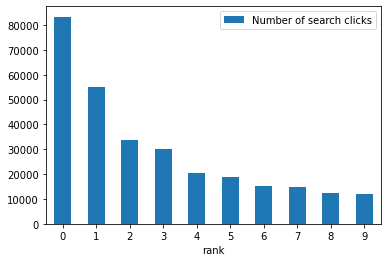

In [38]:
number_of_search_clicks_per_rank_df = pd.DataFrame({'rank':search_click_logs_df['rank'].value_counts().index, 'Number of search clicks':search_click_logs_df['rank'].value_counts().values})
number_of_search_clicks_per_rank_df.plot.bar(x='rank', y='Number of search clicks', rot=0)

### 🚩Number of searches per number of search results

How many of the searches have zero search result? How many of them have only 1 or 2 results? To find out, we can compute the distribution of number of searches per number of search-results.

Calculate the full distribution of number of searches per number of search results:

**Write the answer below:**  

In [22]:
search_logs_df['result'].str.len().value_counts()

10    521397
0       7938
1       2142
2       1606
3       1245
4       1025
6        868
5        855
8        791
7        763
9        659
Name: result, dtype: int64

### 🚩Most searched categories

Find the categories with the most of number of searches. We would like to know the ID of the categories as well as their **title**.

**Write the answer below:**  
(Hint: we can calculate the ID of most searched categories from "search logs" dataframe, but to find their title we should also use the "categories" dataframe; hence you probably need to perform a "join"/"merge" operation to combine the information from two dataframes.)

In [40]:
# find among searches with category id

most_searched_categories_df = pd.DataFrame({'id':searches_with_category_df.category_id.value_counts().index, 'Number of search':searches_with_category_df.category_id.value_counts().values})
categories_df_copy = categories_df.copy()

categories_df_copy.set_index('id', inplace=True)
most_searched_categories_df.set_index('id', inplace=True)

most_searched_categories_df.join(categories_df_copy, how='left').head(20)

,Number of search,title,parent_category_id
id,,,
2580.0,14960,گوشی موبایل,175.0
3110.0,2647,روغن خوراکی,482.0
8564.0,2170,لپ تاپ و نوت بوک,173.0
1092.0,2110,هدفون، هدست و هندزفری,175.0
820.0,2089,کارت گرافیک,240.0
2999.0,1699,تلویزیون,163.0
9663.0,1223,کیف و کاور گوشی,96.0
5094.0,1042,لوازم تزئینی خودرو,126.0
4476.0,926,کولر گازی,2527.0


### 🚩Number of clicks per searches

We would like to know how many of the searches have gotten no clicks, or how many of them have gotten more than one clicks. To find out, we should compute the distribution of number of clicks per searches:

**Write the answer below:**  
(Hint: the search data and search-click data are in two different dataframes. So again we may need to perform a join/merge operation).

In [24]:

most_clicked_searches_df = pd.DataFrame({'id':search_click_logs_df.search_id.value_counts().index, 'Number of clicks':search_click_logs_df.search_id.value_counts().values})
search_logs_df_copy = search_logs_df.copy()


result = pd.merge(search_logs_df_copy, most_clicked_searches_df, on='id', how='left')

print(result['Number of clicks'].isnull().sum(), 'searches have gotten no clicks')
print(most_clicked_searches_df['Number of clicks'].sum(), 'searches have gotten more than one click')
print(len(search_logs_df_copy))

356272 searches have gotten no clicks
295692 searches have gotten more than one click
539289


### 🚩Most clicked products

We are interested to know which product are the most popular. For that, we can count the clicks of each product and consider the most clicked products as the most popular ones. So let's find the top 20 most clicked products (we would like to know the ID, title and number of clicks for those products):

**Write the answer below:**  
(Hint: here we also need to combine information from multiple dataframes; to find the ID of clicked products, we need to consider both of "search logs" and "search clicks" dataframes, and for finding product info we additionally need the "products" dataframe.)

In [25]:

merged_search_and_search_click = pd.merge(search_logs_df, search_click_logs_df, left_on='id', right_on='search_id')
results, results_count = np.unique(np.asarray([merged_search_and_search_click['result'][i][merged_search_and_search_click['rank'][i]] for i in range(0, len(merged_search_and_search_click))]), return_counts=True)
results_df = pd.DataFrame({
    'result_by_rank': results,
    'count': results_count
})
sorted_results_df = results_df.sort_values('count', ascending=False).head(20)


In [26]:
merged_sorted_result_and_products = pd.merge(sorted_results_df, products_df, left_on='result_by_rank', right_on='id')
merged_sorted_result_and_products

,result_by_rank,count,id,title,category_id
0,6754504,932,6754504,گوشی اپل iPhone 13 Pro max (Not Active) | حافظ...,2580
1,9619627,910,9619627,گوشی شیائومی Redmi Note 11 | حافظه 128 رم 6 گی...,2580
2,8783002,866,8783002,روغن نیمه جامد غنجه 4کیلویی,3110
3,3233307,705,3233307,گوشی سامسونگ A32 | حافظه 128 رم 6 گیگابایت,2580
4,6018703,665,6018703,روغن آفتابگردان غنی شده با ویتامین دی810 گرم ا...,3110
5,541613,654,541613,روغن نیمه جامد حاوی امگا3 مناسب پخت و پز لادن ...,3110
6,5373323,601,5373323,گوشی سامسونگ S21 FE 5G | حافظه 256 رم 8 گیگاب...,2580
7,3712777,576,3712777,گوشی شیائومی 11T Pro 5G | حافظه 256 رم 12 گیگا...,2580
8,5187589,574,5187589,گوشی شیائومی Poco F3 5G | حافظه 256 رم 8 گیگابایت,2580
9,9634256,556,9634256,گوشی سامسونگ A13 | حافظه 64 رم 4 گیگابایت,2580


### 🚩Most clicked categories

And finally, we would like to know which categories of the products have the most clicks. In other words, we would like to find out products of which categories have gotten the most clicks in total. Let's find the top 10 most clicked categories, including the ID and title of the categories as well as the total number of clicks for each of those categories:

**Write the answer below:**  
(Hint: again, to calculate this, we need to combine the information of multiple dataframes... actually, all of them!)

In [27]:
merge_for_most_clicked_categories = pd.merge(search_click_logs_df, search_logs_df, left_on='search_id', right_on='id')

categories_id_df = pd.DataFrame({
    'clicked category': merge_for_most_clicked_categories['category_id'].value_counts().index,
    'count': merge_for_most_clicked_categories['category_id'].value_counts().values
})

a = pd.merge(categories_id_df, categories_df, left_on='clicked category', right_on='id')
a.head(10)


,clicked category,count,title,id,parent_category_id
0,2580.0,10934,گوشی موبایل,2580,175.0
1,3110.0,2762,روغن خوراکی,3110,482.0
2,8564.0,1228,لپ تاپ و نوت بوک,8564,173.0
3,1092.0,1197,هدفون، هدست و هندزفری,1092,175.0
4,2999.0,1090,تلویزیون,2999,163.0
5,820.0,1015,کارت گرافیک,820,240.0
6,9663.0,670,کیف و کاور گوشی,9663,96.0
7,3424.0,538,ساعت و مچ بند هوشمند,3424,175.0
8,4476.0,507,کولر گازی,4476,2527.0
9,618.0,486,اسپرسو ساز,618,1309.0
